In [41]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [42]:
data = pd.read_csv('Bank.csv')
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [43]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [44]:
data.drop(["contact","poutcome"], axis= 1,inplace = True)
data.head(10)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,deposit
0,59,admin.,married,secondary,no,2343,yes,no,5,may,1042,1,-1,0,yes
1,56,admin.,married,secondary,no,45,no,no,5,may,1467,1,-1,0,yes
2,41,technician,married,secondary,no,1270,yes,no,5,may,1389,1,-1,0,yes
3,55,services,married,secondary,no,2476,yes,no,5,may,579,1,-1,0,yes
4,54,admin.,married,tertiary,no,184,no,no,5,may,673,2,-1,0,yes
5,42,management,single,tertiary,no,0,yes,yes,5,may,562,2,-1,0,yes
6,56,management,married,tertiary,no,830,yes,yes,6,may,1201,1,-1,0,yes
7,60,retired,divorced,secondary,no,545,yes,no,6,may,1030,1,-1,0,yes
8,37,technician,married,secondary,no,1,yes,no,6,may,608,1,-1,0,yes
9,28,services,single,secondary,no,5090,yes,no,6,may,1297,3,-1,0,yes


In [45]:
default_replace_dict = {'default':{'yes' : 1 , 'no':0}}
housing_replace_dict = {'housing':{'yes' : 1 , 'no':0}}
deposit_replace_dict = {'deposit':{'yes' : 1 , 'no':0}}
loan_replace_dict = {'loan':{'yes' : 1 , 'no':0}}
data.replace(deposit_replace_dict, inplace = True)
data.replace(housing_replace_dict, inplace = True)
data.replace(default_replace_dict, inplace = True)
data.replace(loan_replace_dict, inplace = True)

data.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,deposit
0,59,admin.,married,secondary,0,2343,1,0,5,may,1042,1,-1,0,1
1,56,admin.,married,secondary,0,45,0,0,5,may,1467,1,-1,0,1
2,41,technician,married,secondary,0,1270,1,0,5,may,1389,1,-1,0,1
3,55,services,married,secondary,0,2476,1,0,5,may,579,1,-1,0,1
4,54,admin.,married,tertiary,0,184,0,0,5,may,673,2,-1,0,1


In [46]:
from sklearn.preprocessing import LabelEncoder
data["job"]=LabelEncoder().fit_transform(data["job"])
data["marital"]=LabelEncoder().fit_transform(data["marital"])
data["education"]=LabelEncoder().fit_transform(data["education"])
data["month"]=LabelEncoder().fit_transform(data["month"])
# 1 is married
# 0 is divorced
# 2 is single
data.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,deposit
0,59,0,1,1,0,2343,1,0,5,8,1042,1,-1,0,1
1,56,0,1,1,0,45,0,0,5,8,1467,1,-1,0,1
2,41,9,1,1,0,1270,1,0,5,8,1389,1,-1,0,1
3,55,7,1,1,0,2476,1,0,5,8,579,1,-1,0,1
4,54,0,1,2,0,184,0,0,5,8,673,2,-1,0,1


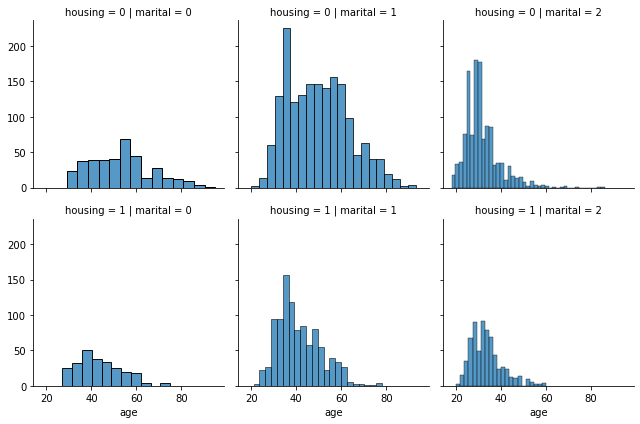

In [47]:
import seaborn as sns
data_ = data[data['deposit'] == 1]
sns.FacetGrid(data_,col="marital",row= "housing").map(sns.histplot,"age")

In [48]:
data.head(10)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,deposit
0,59,0,1,1,0,2343,1,0,5,8,1042,1,-1,0,1
1,56,0,1,1,0,45,0,0,5,8,1467,1,-1,0,1
2,41,9,1,1,0,1270,1,0,5,8,1389,1,-1,0,1
3,55,7,1,1,0,2476,1,0,5,8,579,1,-1,0,1
4,54,0,1,2,0,184,0,0,5,8,673,2,-1,0,1
5,42,4,2,2,0,0,1,1,5,8,562,2,-1,0,1
6,56,4,1,2,0,830,1,1,6,8,1201,1,-1,0,1
7,60,5,0,1,0,545,1,0,6,8,1030,1,-1,0,1
8,37,9,1,1,0,1,1,0,6,8,608,1,-1,0,1
9,28,7,2,1,0,5090,1,0,6,8,1297,3,-1,0,1


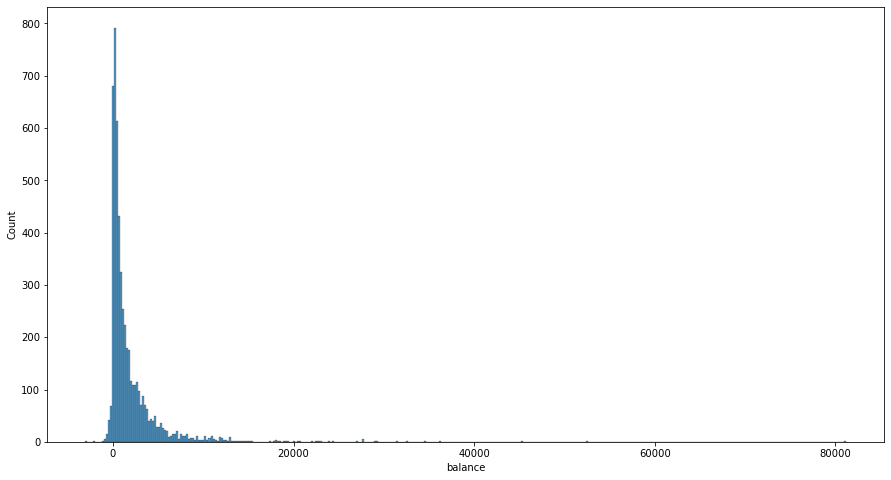

In [49]:
df = data_[['deposit','balance']].sort_values('balance')
plt.figure(figsize=(15,8))
sns.histplot(df['balance'])

sns.set_context("talk")
sns.set_context("notebook",font_scale=1.5, rc={"lines.linewidth":2.5})


In [55]:
from sklearn.model_selection import train_test_split
#features extraction
x=data.drop(["deposit"], axis=1)
y=data["deposit"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)
len(x_train)
x_train_ = x_train[:7000]
x_validat_ = x_train[7000:]

y_train_ = y_train[:7000]
y_validat_ = y_train[7000:]

In [93]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
batch_size = 128
num_classes = 10
epochs = 40

# Create a sequential model here 
model = Sequential([
   
    
    Dense(28, activation='relu',input_shape=(14,)),
    Dropout(0.3),
    
    Dense(1,activation='sigmoid'),
])

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.00005), metrics=["accuracy"]) # Configure the model for training
history = model.fit(x_train_, y_train_, validation_data=(x_validat_, y_validat_), epochs=40, batch_size=5,verbose=1) #training

model.summary()


# End Code

Epoch 1/40
1400/1400 [==============================] - 2s 1ms/step - loss: 201.6955 - accuracy: 0.4991 - val_loss: 109.6530 - val_accuracy: 0.4655
Epoch 2/40
1400/1400 [==============================] - 1s 1ms/step - loss: 107.8667 - accuracy: 0.4781 - val_loss: 23.2057 - val_accuracy: 0.4593
Epoch 3/40
1400/1400 [==============================] - 1s 1ms/step - loss: 89.2532 - accuracy: 0.4846 - val_loss: 11.9206 - val_accuracy: 0.4479
Epoch 4/40
1400/1400 [==============================] - 1s 1ms/step - loss: 85.7719 - accuracy: 0.4947 - val_loss: 9.7397 - val_accuracy: 0.4769
Epoch 5/40
1400/1400 [==============================] - 1s 973us/step - loss: 76.7289 - accuracy: 0.5036 - val_loss: 11.5939 - val_accuracy: 0.5262
Epoch 6/40
1400/1400 [==============================] - 1s 1ms/step - loss: 65.4733 - accuracy: 0.5216 - val_loss: 6.3645 - val_accuracy: 0.5376
Epoch 7/40
1400/1400 [==============================] - 2s 1ms/step - loss: 60.8569 - accuracy: 0.5413 - val_loss: 7.6124

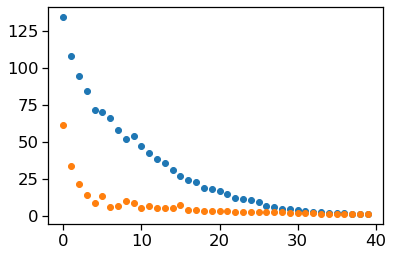

In [91]:
import matplotlib.pyplot as plt

plt.scatter(history.epoch, history.history["loss"])
plt.scatter(history.epoch, history.history["val_loss"])

In [90]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test accuracy:', score[1]) 
# You should be able to get,at least, 88% accuracy

70/70 [==============================] - 0s 1ms/step - loss: 0.7714 - accuracy: 0.7412
Test accuracy: 0.7411553859710693
